# CNN_MODEL

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import keras
from keras.utils import to_categorical

In [2]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_train1=X_train1/255

In [6]:
X_train1.shape

(60000, 28, 28, 1)

In [7]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(100,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.03), metrics=['accuracy'])

y_train_encoded = to_categorical(y_train)

h=model.fit(X_train1,y_train_encoded, batch_size=4000, epochs=10, validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 25s 2s/step - loss: 1.4774 - accuracy: 0.5939 - val_loss: 0.2700 - val_accuracy: 0.9226
Epoch 2/10
12/12 [==============================] - 20s 2s/step - loss: 0.2125 - accuracy: 0.9395 - val_loss: 0.1354 - val_accuracy: 0.9597
Epoch 3/10
12/12 [==============================] - 21s 2s/step - loss: 0.1044 - accuracy: 0.9679 - val_loss: 0.0901 - val_accuracy: 0.9746
Epoch 4/10
12/12 [==============================] - 20s 2s/step - loss: 0.0673 - accuracy: 0.9792 - val_loss: 0.0768 - val_accuracy: 0.9773
Epoch 5/10
12/12 [==============================] - 20s 2s/step - loss: 0.0484 - accuracy: 0.9854 - val_loss: 0.0701 - val_accuracy: 0.9799
Epoch 6/10
12/12 [==============================] - 20s 2s/step - loss: 0.0366 - accuracy: 0.9890 - val_loss: 0.0673 - val_accuracy: 0.9812
Epoch 7/10
12/12 [==============================] - 20s 2s/step - loss: 0.0282 - accuracy: 0.9921 - val_loss: 0.0653 - val_accuracy: 0.9819
Epoch 8/10
12/12 [==

In [9]:
import pandas as pd
hist=pd.DataFrame(h.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,1.477374,0.593896,0.269981,0.922583
1,0.212471,0.939500,0.135407,0.959667
2,0.104387,0.967854,0.090146,0.974583
3,0.067333,0.979187,0.076812,0.977333
4,0.048447,0.985417,0.070146,0.979917
5,0.036564,0.988979,0.067295,0.981250
6,0.028179,0.992146,0.065296,0.981917
7,0.021789,0.993646,0.062803,0.983417
8,0.016548,0.995708,0.064830,0.983583
9,0.012469,0.996750,0.065795,0.983583


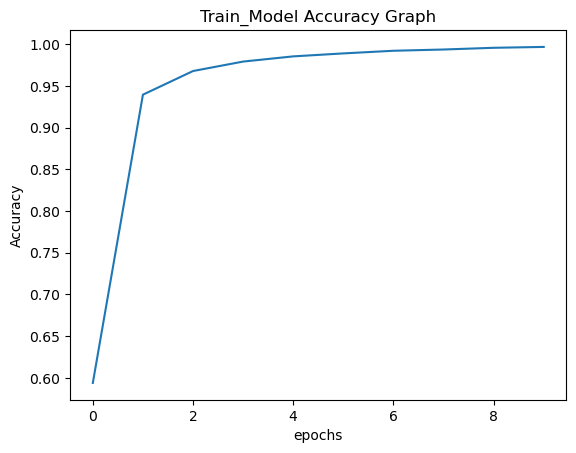

In [10]:
import matplotlib.pyplot as plt
plt.plot(hist.index,hist['accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Train_Model Accuracy Graph')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
X_test/255

import numpy as np
y_pred=model.predict(X_test)

y_pred_1 = np.argmax(y_pred, axis=1)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_1)

print("Accuracy:", accuracy)
cf=confusion_matrix(y_test, y_pred_1)
print(cf)

313/313 [==============================] - 3s 8ms/step
Accuracy: 0.9812
[[ 964    1    3    0    0    2    4    2    4    0]
 [   0 1124    1    2    0    0    2    1    5    0]
 [   1    1 1010    1    1    0    0    9    7    2]
 [   0    0    2 1003    0    1    0    1    3    0]
 [   0    0    0    0  971    0    3    2    0    6]
 [   1    0    1   18    0  863    3    0    6    0]
 [   5    2    0    0    1    2  943    0    5    0]
 [   1    0    5    1    1    0    0 1015    2    3]
 [   1    0    9    5    4    3    0    8  942    2]
 [   2    3    0    1    9    4    0   11    2  977]]


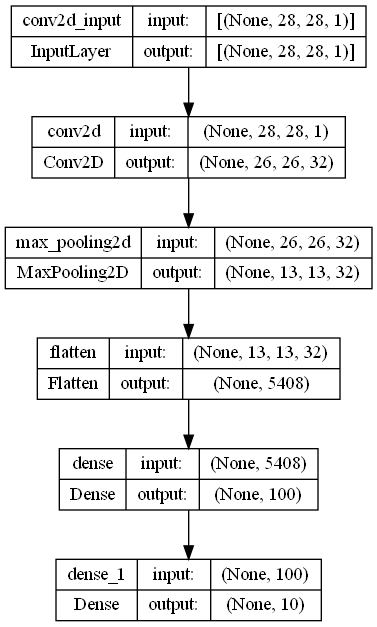

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True,rankdir='TB')

It looks like you have created a simple Convolutional Neural Network (CNN) model for image classification using Keras. Let's break down the code step by step:

## model=Sequential():
This creates a sequential model, which allows you to build the neural network layer by layer.

## model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))): 
This adds a 2D convolutional layer with 32 filters, each of size 3x3. The activation function used is ReLU (Rectified Linear Unit). The input shape is (28, 28, 1), which represents a grayscale image of size 28x28 pixels.

## model.add(MaxPool2D(2,2)): 
This adds a max-pooling layer with a pool size of 2x2, which reduces the spatial dimensions of the data.

## model.add(Flatten()): 
This flattens the output of the previous layer into a 1D vector, as required for the Dense (fully connected) layers.

## model.add(Dense(100,activation='relu')):
This adds a fully connected Dense layer with 100 units and ReLU activation.

## model.add(Dense(10,activation='softmax')):
This adds the output layer with 10 units (equal to the number of classes in the dataset) and uses the softmax activation function. Softmax converts the raw scores into probability values, representing the probability of each class.

## model.compile(loss='categorical_crossentropy',
## optimizer=keras.optimizers.Adam(learning_rate=0.03), metrics=['accuracy']):
This compiles the model with the specified loss function (categorical cross-entropy), optimizer (Adam with a learning rate of 0.03), and evaluation metric (accuracy).

y_train_encoded = to_categorical(y_train):
It appears that you have one-hot encoded the target labels y_train using the to_categorical function. This is necessary when using categorical cross-entropy as the loss function.

## h=model.fit(X_train1,y_train_encoded,
## batch_size=4000, epochs=10, validation_split=0.2):
This fits the model to the training data X_train1 with the corresponding one-hot encoded labels y_train_encoded. The training is performed for 10 epochs with a batch size of 4000. The validation_split parameter specifies that 20% of the training data will be used for validation during training.

Overall, this code sets up a CNN model for image classification, compiles it with the specified loss and optimizer, and then trains the model on the provided data.

## please explain how CNN input shape are set and what dimensions CNN model accept for input?

In a Convolutional Neural Network (CNN), the input shape is determined by the dimensions of the input data. CNNs are primarily used for image and video data, although they can also be applied to other types of data with spatial structure, such as audio spectrograms.

The input shape of a CNN is represented as a 4-dimensional tensor (or ndarray) with the following dimensions:

Batch Size: The number of samples (data points) in each batch. It is a hyperparameter that you can set when training the model. For example, if you set the batch size to 32, the input tensor will have a shape of (32, height, width, channels).

Height: The height of the input image (or spatial dimension). It represents the number of rows in the image.

Width: The width of the input image (or spatial dimension). It represents the number of columns in the image.

Channels: The number of channels in the image. For grayscale images, the number of channels is 1 (representing black and white). For RGB (color) images, the number of channels is 3 (representing red, green, and blue).

For example, if you have a batch of 100 RGB color images, each with a resolution of 64x64 pixels, the input shape would be (100, 64, 64, 3).

When defining a CNN in frameworks like Keras or PyTorch, the input shape is usually specified only for the first layer of the model, and subsequent layers automatically infer their input shapes based on the output shapes of the previous layers.

It's important to ensure that the input shape provided to the CNN model matches the actual shape of the data you are feeding into it. If the input shape is incorrect, you may encounter errors during model training or inference.

It's also common practice to preprocess the input data, such as resizing images to a fixed resolution or normalizing pixel values to a specific range, before feeding them into the CNN. Preprocessing helps in achieving better model performance and reduces the computational load during training.

# Woking of CNN:-

The Convolutional Neural Network (CNN) is a type of deep learning model that is widely used for image recognition and computer vision tasks. CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input data, making them well-suited for tasks involving images and other grid-like data (e.g., time series).

Here's a high-level overview of how CNNs work:

## Convolutional Layer:
The key building block of CNNs is the convolutional layer. It consists of a set of learnable filters (also called kernels or feature detectors) that slide over the input data (e.g., an image) to extract local patterns and features. Each filter represents a specific pattern or feature it is trying to detect.

During the convolution operation, the filter is convolved with the input data by taking element-wise products and summing them up. The result is a feature map that highlights the presence of the detected pattern in different locations of the input.

## Activation Function:
After the convolution operation, an activation function (typically ReLU - Rectified Linear Unit) is applied to introduce non-linearity to the network. This allows the CNN to learn complex patterns and relationships in the data.

## Pooling Layer:
Pooling layers are used to reduce the spatial dimensions of the feature maps while retaining the most important information. Max pooling is a commonly used technique, where the maximum value in a small region (e.g., 2x2) of the feature map is retained, and the rest are discarded. This helps reduce the computational complexity and control overfitting.

## Flattening:
After several convolution and pooling layers, the output is often flattened into a 1D vector. This flattening step converts the spatial information into a format suitable for the fully connected layers.

## Fully Connected Layers:
The flattened output is connected to one or more fully connected layers, which are similar to traditional neural networks. These layers learn high-level patterns and relationships from the features extracted by the earlier layers.

## Output Layer:
The final layer of the CNN is the output layer, which represents the predictions of the model. The number of nodes in this layer corresponds to the number of classes in the classification task. For example, in a digit recognition task, there would be 10 output nodes (0 to 9) if there are 10 possible digits.

## Loss Function and Optimization:
The choice of loss function depends on the task. For multi-class classification tasks like image recognition, cross-entropy loss is commonly used. The model is trained to minimize this loss using optimization algorithms such as Stochastic Gradient Descent (SGD) or Adam.

## Training:
During the training process, the model iteratively adjusts its learnable parameters (weights and biases) to minimize the loss on the training data. This process is known as backpropagation, where gradients are computed and used to update the parameters.

By leveraging the hierarchical learning approach of CNNs, the model can automatically learn meaningful and hierarchical representations of the input data, leading to powerful and efficient image recognition systems.

# Concept of shape in CNN and Sequential:-

Yes, that's correct. If you want to give input as (28, 28) to your neural network, you do not need to flatten your image.

The shape (28, 28) implies that you are treating each image as a 2D grid with 28 rows and 28 columns, which is typical for image data. Each pixel in the image will be considered as a separate input element.

When working with 2D images and using a Convolutional Neural Network (CNN) or similar models, you should maintain the original shape of the images, and there is no need to flatten them.

Here's an example of how to create a simple CNN in Keras to work with 2D images of size (28, 28):

python
Copy code
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Rest of the code for compiling and training the model
In this example, we define a CNN that takes input images of size (28, 28, 1), where the last dimension 1 represents a single channel, indicating grayscale images. If your images are RGB (color images), you would use (28, 28, 3) as the input shape.

Remember, when using 2D images, there is no need to flatten them. The CNN will automatically handle the spatial relationships between pixels and learn hierarchical features directly from the 2D data.

No, (28, 28) and (28*28,) are not the same in the context of input shapes for a neural network.

(28, 28): This represents a 2D input shape, where the first dimension is the number of rows (height) and the second dimension is the number of columns (width). It is used for 2D data, such as images or 2D grids.

(28*28,): This represents a 1D input shape with 784 elements. It is a flattened representation of a 28x28 image. It means that the 2D image has been converted into a 1D vector by concatenating its rows or columns.

In a neural network, the input shape should match the format of the data you are feeding into it. If you have 2D data, such as images with dimensions (28, 28), you should use (28, 28) as the input shape. For example:

## Code:-
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28, 28)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In this case, the model expects 2D input data with 28 rows and 28 columns.

On the other hand, if you have already flattened the 28x28 images into a 1D vector of length 784, you should use (28*28,) as the input shape. For example:
## Code:-
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28*28,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In this case, the model expects 1D input data with 784 elements.

So, the choice of input shape depends on how your data is represented. If you have 2D data, use (28, 28), and if you have flattened it into a 1D vector, use (28*28,).